### Step 1: Setting Up Your Environment
Make sure you have the necessary libraries installed. Install them using pip if you haven't already:

In [41]:
# pip install numpy pandas scikit-learn matplotlib

### Step 2: Import Necessary Libraries
First, let's import all the required libraries.

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Step 3: Load and Explore the Dataset
We'll use the Boston Housing dataset here, which used to be available directly from Scikit-learn :(
    
But we don't have that option, so we download the dataset csv file from Kaggle, and put the file in our folder. We do the loading manually.

In [43]:
df_boston = pd.read_csv('BostonHousing.csv')
df_boston.tail(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [44]:
# define features
X = df_boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']].values
X[:5]

# define target
y = df_boston['medv']
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### Step 4: Preprocess the Data
Split the dataset into training and testing sets.

In [45]:
indices = np.arange(y.shape[0])
indices

rnd = np.random.RandomState(1)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

X_train, y_train = X_shuffled[:400], y_shuffled[:400]
X_test, y_test = X_shuffled[400:], y_shuffled[400:]

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 400 samples
Testing set size: 106 samples


### Step 5: Train a Linear Regression Model
Use Scikit-learn's LinearRegression to train the model.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Output the model parameters
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: 25.997353609179875
Coefficients: [ -9.43096288   4.31754902  -0.25220895   3.03411302  -7.75108781
  20.63713492  -0.83385754 -16.44923378   7.32963813  -6.6232152
  -8.41236699   4.00353465 -18.4887823 ]


### Step 6: Make Predictions
Use the trained model to make predictions on the test set.

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Display the first few predictions
print('First few predictions:', y_pred[:5])
print('First few actual values:', y_test.values[:5])


First few predictions: [24.90959613 30.73047204 17.89298572 17.27126414 28.89812647]
First few actual values: [23.1 32.5 19.6 14.9 26.4]


### Step 7: Evaluate the Model
Calculate and print the Mean Squared Error (MSE) and R-squared (R²) value.

In [49]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²) value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 22.491253151277558
R-squared: 0.7380776980282728
Root Mean Squared Error: 4.742494401818262


### Step 8: Visualize the Results
Plot the actual vs. predicted values.

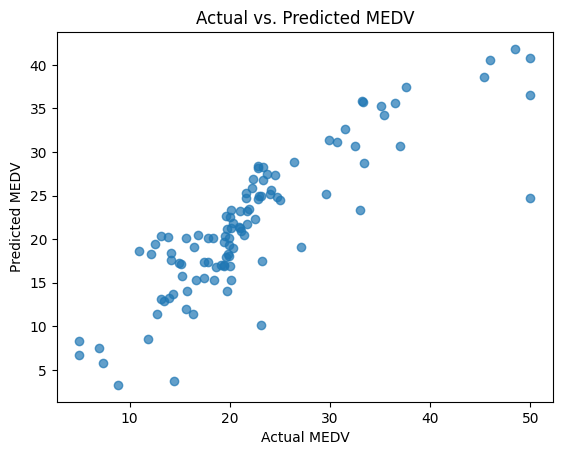

In [50]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs. Predicted MEDV')
plt.show()
